In [1]:
import pandas as pd

In [2]:
lol = pd.read_csv('./data/sample_ChallengerKDA.csv')
lol.drop(['Unnamed: 0'],axis=1,inplace=True)
lol

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,2.04,3.62,1.84,2.35,2.97
1,1,2.95,3.62,1.84,2.37,2.57
2,1,2.44,3.62,2.67,1.76,3.14
3,1,1.60,3.62,2.67,3.10,2.66
4,1,2.67,3.62,2.63,3.10,3.36
...,...,...,...,...,...,...
2494,0,2.27,3.86,3.08,2.59,3.33
2495,1,2.04,2.92,3.86,2.40,4.36
2496,0,2.58,3.86,2.45,2.52,2.43
2497,0,1.65,2.30,1.69,3.86,3.53


Text(0.5, 1.0, 'Count plot - Game Result')

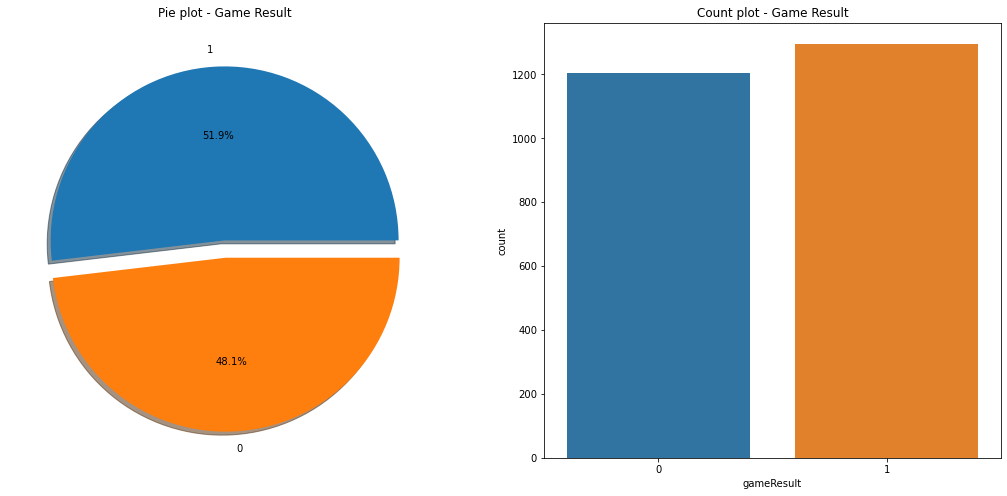

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

lol['gameResult'].value_counts().plot.pie(explode= [0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Game Result')
ax[0].set_ylabel('')
sns.countplot('gameResult', data=lol, ax=ax[1])
ax[1].set_title('Count plot - Game Result')

In [4]:
pd.crosstab(lol['JUNGLE'], lol['gameResult'], margins=True)

gameResult,0,1,All
JUNGLE,,,
1.1,1,0,1
1.35,0,1,1
1.39,1,0,1
1.6,5,4,9
1.62,2,0,2
...,...,...,...
4.81,2,4,6
4.94,2,2,4
5.03,3,12,15


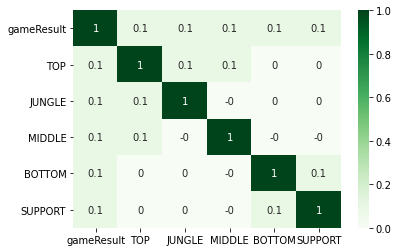

In [5]:
correlation_matrix = lol.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='Greens')

In [6]:
lol['TOP'].unique()

array([2.04, 2.95, 2.44, 1.6 , 2.67, 1.54, 2.16, 2.68, 1.58, 1.71, 2.17,
       2.42, 2.65, 1.7 , 1.38, 1.8 , 2.59, 2.23, 1.48, 2.78, 3.11, 2.74,
       2.52, 2.27, 2.28, 2.82, 3.41, 1.65, 1.56, 2.22, 3.64, 2.85, 2.9 ,
       2.86, 2.25, 1.63, 1.94, 2.01, 3.42, 1.1 , 3.02, 2.49, 1.85, 2.62,
       2.87, 2.37, 1.53, 2.08, 2.3 , 3.04, 2.91, 2.07, 1.37, 1.59, 2.99,
       2.69, 2.88, 1.82, 3.69, 3.56, 2.29, 2.03, 2.76, 2.09, 2.43, 1.76,
       2.31, 1.86, 2.21, 1.75, 2.75, 2.2 , 3.07, 1.24, 2.05, 3.12, 1.55,
       2.32, 2.41, 4.15, 3.34, 2.81, 3.57, 2.63, 1.62, 2.77, 1.72, 2.8 ,
       3.13, 1.2 , 1.35, 1.99, 3.2 , 3.06, 1.81, 2.4 , 2.45, 3.59, 2.11,
       2.92, 2.89, 3.46, 1.32, 1.45, 1.93, 1.31, 3.29, 2.13, 2.46, 3.52,
       3.18, 2.72, 3.3 , 2.36, 2.58, 2.15, 2.93, 3.66, 2.33, 1.9 , 3.38,
       3.47, 3.43, 3.36, 3.84, 2.51, 2.02, 3.82, 2.14, 1.84, 2.34, 3.58,
       1.92, 2.53, 2.64, 2.6 , 2.1 , 1.47, 4.24, 1.5 , 2.26, 3.77, 1.79,
       1.77, 4.14, 2.  , 3.37, 2.39, 2.55, 1.78, 3.

In [7]:
lol.head()

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,2.04,3.62,1.84,2.35,2.97
1,1,2.95,3.62,1.84,2.37,2.57
2,1,2.44,3.62,2.67,1.76,3.14
3,1,1.60,3.62,2.67,3.10,2.66
4,1,2.67,3.62,2.63,3.10,3.36


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(lol['TOP'])
lol['TOP'] = le.transform(lol['TOP'])
le.fit(lol['JUNGLE'])
lol['JUNGLE'] = le.transform(lol['JUNGLE'])
le.fit(lol['MIDDLE'])
lol['MIDDLE'] = le.transform(lol['MIDDLE'])
le.fit(lol['BOTTOM'])
lol['BOTTOM'] = le.transform(lol['BOTTOM'])
le.fit(lol['SUPPORT'])
lol['SUPPORT'] = le.transform(lol['SUPPORT'])



In [9]:

lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   gameResult  2499 non-null   int64
 1   TOP         2499 non-null   int32
 2   JUNGLE      2499 non-null   int32
 3   MIDDLE      2499 non-null   int32
 4   BOTTOM      2499 non-null   int32
 5   SUPPORT     2499 non-null   int32
dtypes: int32(5), int64(1)
memory usage: 68.4 KB


In [10]:
from sklearn.model_selection import train_test_split

X = lol[['TOP','JUNGLE','MIDDLE','BOTTOM','SUPPORT']]
# X = lol[['oChamp2','oChamp3','oChamp4','oChamp5','eChamp2','eChamp3','eChamp4','eChamp5']]
y = lol['gameResult']

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=0.201, random_state=13)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.5506958250497018


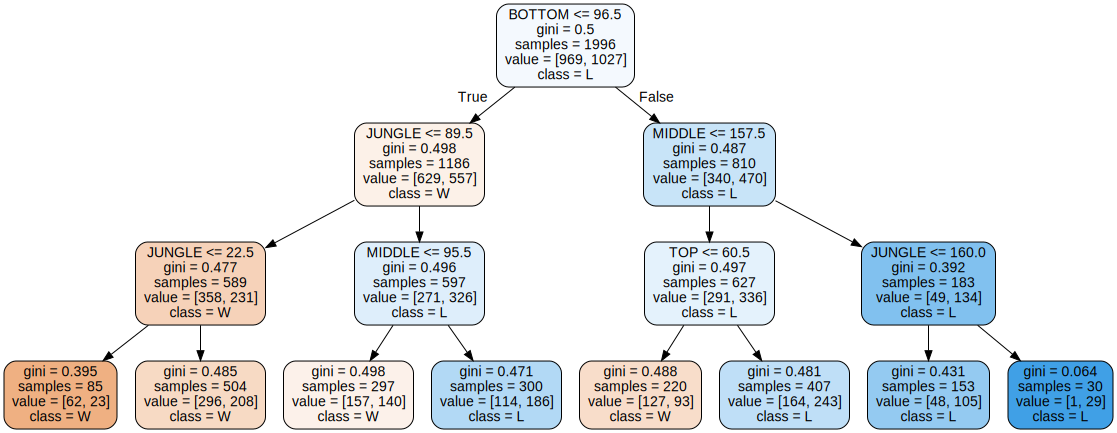

In [12]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(dt, feature_names=X_train.columns, class_names=['W','L'], rounded=True, filled=True))

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.5864811133200796


In [14]:
lol

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,57,149,34,60,107
1,1,134,149,34,62,68
2,1,94,149,108,15,123
3,1,22,149,108,126,77
4,1,111,149,104,126,139
...,...,...,...,...,...,...
2494,0,78,165,145,80,137
2495,1,57,98,191,65,195
2496,0,104,165,88,74,57
2497,0,25,45,22,170,153


In [15]:
import numpy as np
# Zed,Rammus,Orianna,Ezreal,Yuumi
# Gangplank,Vollbear,Zoe,Kai'Sa,Blitzcrank
thisPic = np.array([[1.99,2.75, 1.86, 2.01, 1.94]])
winRate = lr.predict_proba(thisPic)[0,1]
if winRate >= 0.5 and winRate <=0.6:
    print("해볼만함 열심히 해보삼")
elif winRate <0.5 and winRate >=0.3:
    print("팀상태보고 원하면 닷지 요망")
elif winRate <0.3:
    print("그냥 닷지 요망")
else:
    print("진짜 개좋음 버스 부우우웅")
print('우리팀의 승률 : ',lr.predict_proba(thisPic)[0,1]*100,"%")

그냥 닷지 요망
우리팀의 승률 :  18.63880595061679 %
